In [1]:
import xarray as xr

In [10]:
import numpy as np

In [39]:

# for figures
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

In [9]:
def quick_map(lons, lats, data, title=None, **kwargs):
    f, a = plt.subplots(subplot_kw={"projection":ccrs.Robinson()})
    # pass in norm as kwarg if needed
    # norm = mpl.colors.Normalize(vmin=1979, vmax=2019)
    img = a.pcolormesh(lons, lats, data, transform=ccrs.PlateCarree(), **kwargs)
    a.set_title(title)
    f.colorbar(img, shrink=0.4)
    return f, a

In [2]:
ds = xr.open_dataset("/project/amp/brianpm/TemperatureExtremes/Derived/CPC_tmax_90pct_event_mean_duration.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:        (lat: 360, lon: 720, month: 12)
Coordinates:
  * lat            (lat) float64 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon            (lon) float64 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * month          (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mean_duration  (month, lat, lon) float64 ...

In [4]:
d = ds['mean_duration']

In [5]:
d

<xarray.DataArray 'mean_duration' (month: 12, lat: 360, lon: 720)>
[3110400 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float64 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [11]:
lons, lats = np.meshgrid(ds['lon'], ds['lat'])

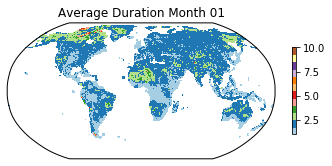

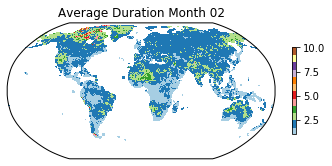

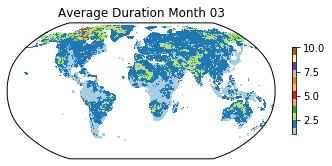

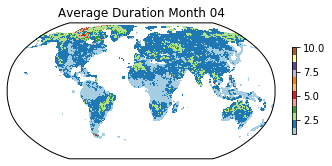

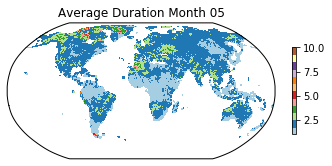

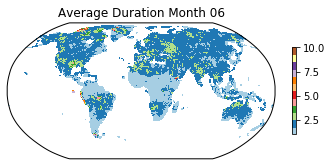

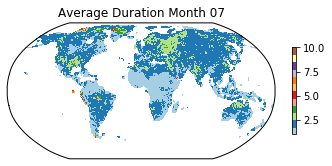

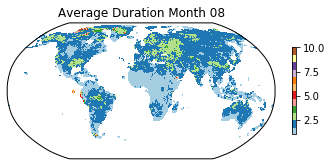

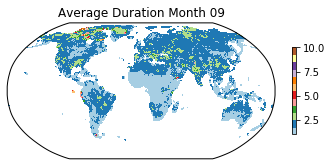

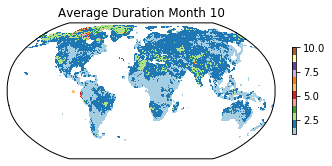

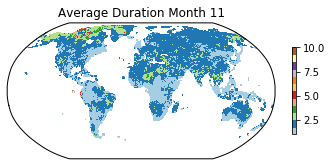

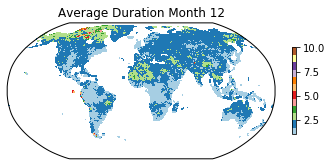

In [31]:
norm = mpl.colors.Normalize(vmin=1, vmax=10)
cm = mpl.cm.Paired
for m in d.month:
    fig, ax = quick_map(lons, lats, d.sel(month=m), title=f"Average Duration Month {m.values:02d}",
                       **{"norm":norm, "cmap":cm})

Now check on the model output

In [35]:
mds = xr.open_dataset("/project/amp/brianpm/TemperatureExtremes/Derived/f.e13.FAMIPC5CN.ne30_ne30.beta17.TREFMXAV.90pct_event_mean_duration.nc")
md = mds['mean_duration']

/project/amp/brianpm/miniconda3/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


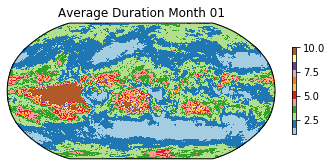

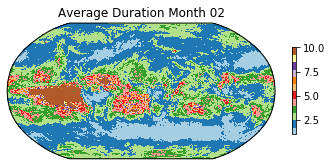

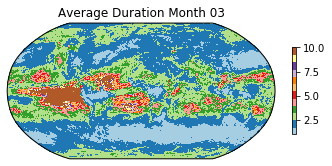

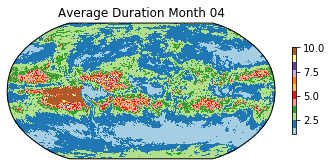

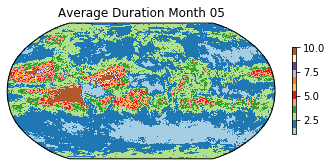

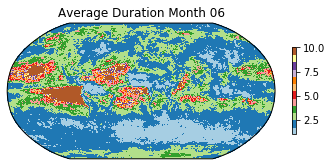

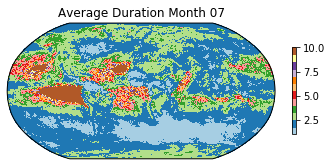

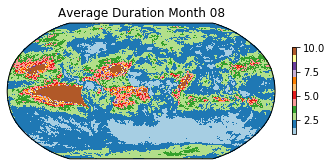

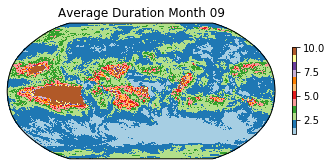

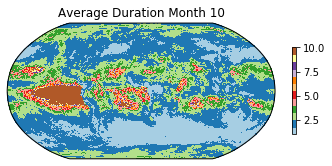

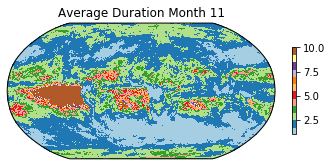

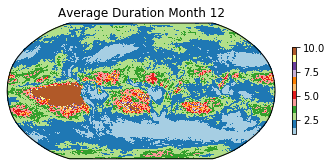

In [40]:
norm = mpl.colors.Normalize(vmin=1, vmax=10)
cm = mpl.cm.Paired
for m in md.month:
    fig, ax = quick_map(lons, lats, md.sel(month=m), title=f"Average Duration Month {m.values:02d}",
                       **{"norm":norm, "cmap":cm})
    ax.add_feature(cartopy.feature.OCEAN)

*Well* one interesting thing to note is that the model also has much longer duration on average in northern Canada and Alaska, in agreement with the observations.